# Binary Logistic Regression with Sklearn

In [1]:
from __future__ import print_function # for python 2 and 3 compatibility
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Load the iris dataset

In [2]:
df_iris = pd.read_csv('iris.csv', header=None,
                      names=['sepal_length', 'sepal_width', 'label_str'])

# make column with binary label
str_to_int = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df_iris['label_int'] = df_iris['label_str'].apply(lambda label_str: str_to_int[label_str])
df_iris.tail()

,sepal_length,sepal_width,label_str,label_int
145,6.7,3.0,Iris-virginica,2
146,6.3,2.5,Iris-virginica,2
147,6.5,3.0,Iris-virginica,2
148,6.2,3.4,Iris-virginica,2
149,5.9,3.0,Iris-virginica,2


In [3]:
# select data, features, labels
X = df_iris[['sepal_length', 'sepal_width']]
y = df_iris['label_int']
X, y = X[:100], y[:100] # use 2 labels only (binary classification, setosa & versicolor)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)

(70, 2) (70,)


## Fit  model

In [4]:
from sklearn.linear_model import LogisticRegression

# instantiate and fit model
model = LogisticRegression()
model = model.fit(X_train, y_train)

print('Coefficients:', model.coef_, 'Bias:', model.intercept_)

Coefficients: [[ 1.94893547 -3.22306083]] Bias: [-0.5367786]


## Evaluate model

In [5]:
# evaluate model
train_acc =  model.score(X_train, y_train)
test_acc =  model.score(X_test, y_test)
print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))

Train accuracy: 0.985714285714
Test accuracy: 1.0


In [6]:
# Define function to plot decision region

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):


    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

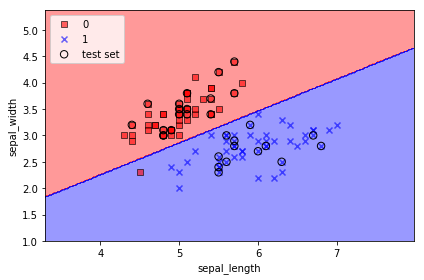

In [7]:
# plot decision region

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
num_train, num_test = len(X_train), len(X_test)

plot_decision_regions(X_combined, y_combined, classifier=model, test_idx=range(num_train, num_train+num_test))
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
